<a href="https://colab.research.google.com/github/andreac941/tutorials/blob/main/fundamentals_DL_CNN_cifar10_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neuronales Convolucionales con PyTorch

In [2]:
import numpy as np
#paquetes pytorch:
import torch
import torch.nn as nn
import torch.nn.functional as F
#modulos para manejar bases de datos:
from torch.utils.data import DataLoader
#Sampler: Hacer muestra a partir de DataLoader:
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T # hacer transformaciones a datos.
import matplotlib.pyplot as plt
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()


### Descargar Cifar10 dataset

<img src="cifar10.png">

In [3]:
DATA_PATH = '/media/josh/MyData2SSD/Databases/cifar-10-batches-py' # path para guardar imágenes
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(), #convertir a tendor
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261]) # normalizar datos, media para cada canal y desv. std de cada canal
            ]) #serie de transformaciones - que sirviría para Data Augmentation (tener más datos sintéticos)

# Train dataset - paquete datasets ('x' ,  'y' en un objeto)
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
     #obj dataloader, wrap de dataset para hacer iterables los objetos, sampler es para muestreo aleatorio (importante que no sea consecutivo el grupo de datos).
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:02<00:00, 78060839.97it/s]


Extracting /media/josh/MyData2SSD/Databases/cifar-10-batches-py/cifar-10-python.tar.gz to /media/josh/MyData2SSD/Databases/cifar-10-batches-py
Files already downloaded and verified
Files already downloaded and verified


In [4]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /media/josh/MyData2SSD/Databases/cifar-10-batches-py
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [5]:
test_loader.dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /media/josh/MyData2SSD/Databases/cifar-10-batches-py
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

### Usar GPUs

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: frog


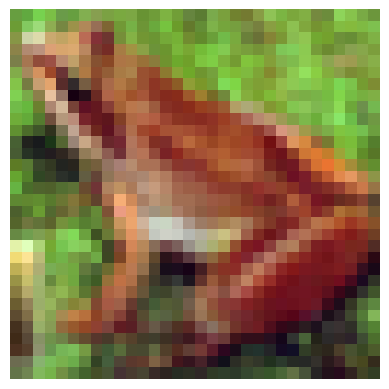

In [8]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


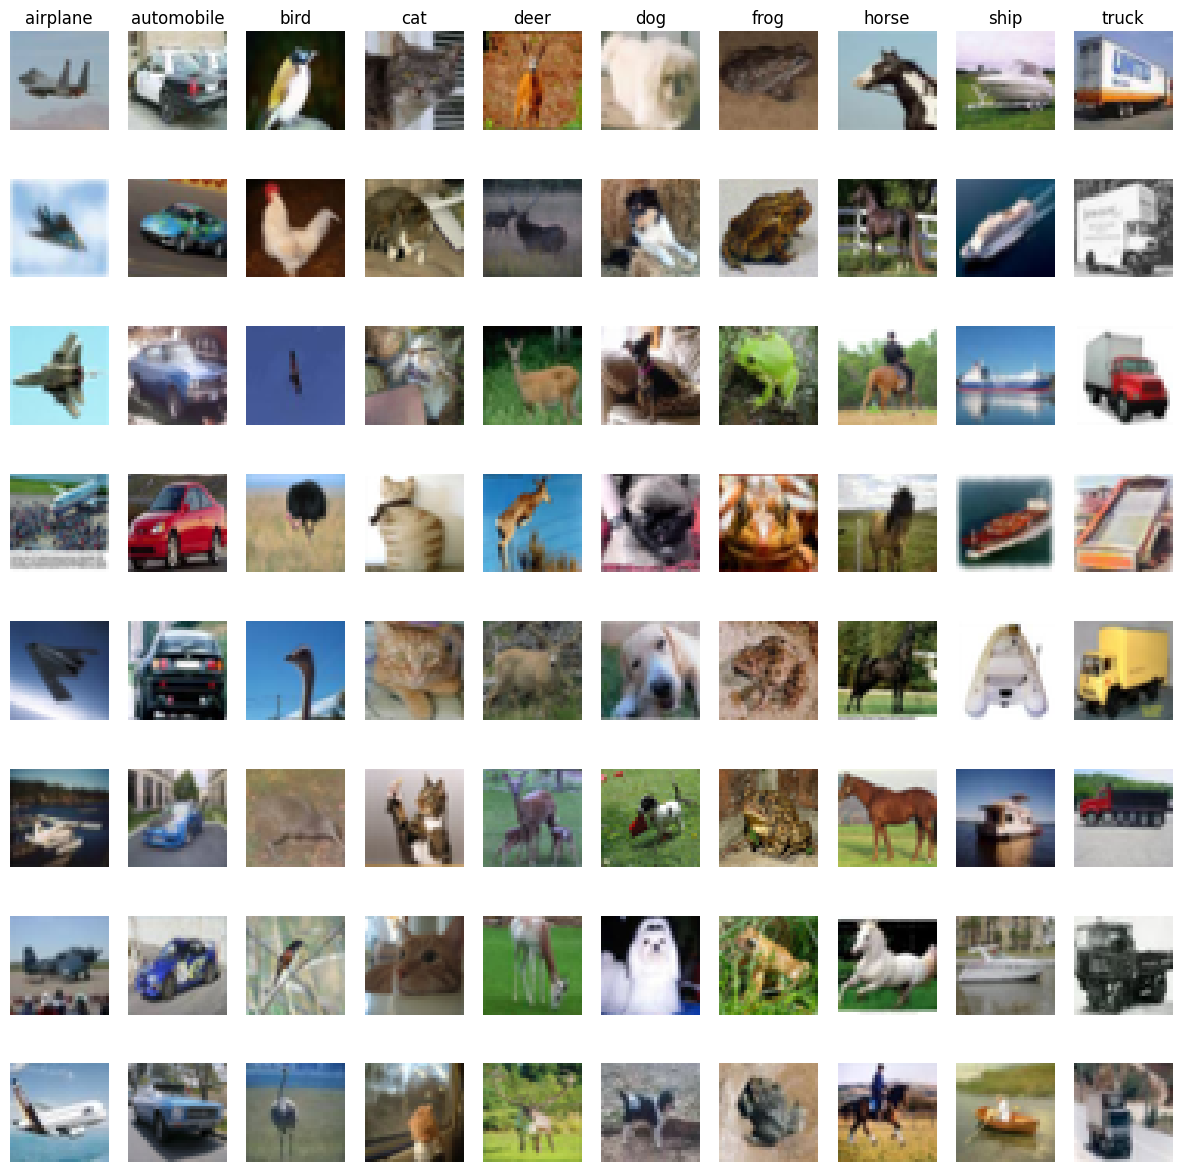

In [9]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [10]:
# # minibatch, x son las imágenes con 64 imágenes con 3 canales, de 32x32 tamaño y un núm. de la clase de cada imagen:
for i, (x,y) in enumerate(test_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 32, 32]) torch.Size([64])
1 torch.Size([64, 3, 32, 32]) torch.Size([64])
2 torch.Size([64, 3, 32, 32]) torch.Size([64])
3 torch.Size([64, 3, 32, 32]) torch.Size([64])
4 torch.Size([64, 3, 32, 32]) torch.Size([64])
5 torch.Size([64, 3, 32, 32]) torch.Size([64])
6 torch.Size([64, 3, 32, 32]) torch.Size([64])
7 torch.Size([64, 3, 32, 32]) torch.Size([64])
8 torch.Size([64, 3, 32, 32]) torch.Size([64])
9 torch.Size([64, 3, 32, 32]) torch.Size([64])
10 torch.Size([64, 3, 32, 32]) torch.Size([64])
11 torch.Size([64, 3, 32, 32]) torch.Size([64])
12 torch.Size([64, 3, 32, 32]) torch.Size([64])
13 torch.Size([64, 3, 32, 32]) torch.Size([64])
14 torch.Size([64, 3, 32, 32]) torch.Size([64])
15 torch.Size([64, 3, 32, 32]) torch.Size([64])
16 torch.Size([64, 3, 32, 32]) torch.Size([64])
17 torch.Size([64, 3, 32, 32]) torch.Size([64])
18 torch.Size([64, 3, 32, 32]) torch.Size([64])
19 torch.Size([64, 3, 32, 32]) torch.Size([64])
20 torch.Size([64, 3, 32, 32]) torch.Size([64])
21

In [12]:
def accuracy(model, loader): #recibe objecto dataloader
    num_correct = 0
    num_total = 0
    model.eval() #no es para entrenar, solo mostrar accuracies
    model = model.to(device=device)
    with torch.no_grad(): #no se calcula gradiente
        for xi, yi in loader:
            xi = xi.to(device=device, dtype = torch.float32) #pasar los datos a gpu.
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi)
            _, pred = scores.max(dim=1) #se saca score máx. de todos los elementos del minibatch
            num_correct += (pred == yi).sum() #1 si la clase corresponde, 0 si no.
            num_total += pred.size(0)
        return float(num_correct)/num_total  #núm. de elementos correctos / total de elementos = accuracy

### Loop de entrenamiento

In [14]:
def train(model, optimiser, epochs=100): #recibimos modelos, optimizador y epochs
    model = model.to(device=device)
    for epoch in range(epochs): #loop para c/epoch
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi) #funcion de costo
            optimiser.zero_grad()  #borramos gradientes ya calculados.
            cost.backward()
            optimiser.step()   #actualizacion de parametros segun optimizer.
        acc = accuracy(model, val_loader) #se llama funcion accuracy
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')

### Sequential linear

In [15]:
hidden1 = 256
hidden = 256
lr = 0.001
epochs = 10
model1 = nn.Sequential(nn.Flatten(), #modulo Sequential
                       nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr) #adam de optimizer

In [16]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.7647628784179688, accuracy: 0.4718,
Epoch: 1, costo: 1.2919379472732544, accuracy: 0.4976,
Epoch: 2, costo: 1.0803420543670654, accuracy: 0.5228,
Epoch: 3, costo: 1.0550309419631958, accuracy: 0.5092,
Epoch: 4, costo: 1.654484510421753, accuracy: 0.529,
Epoch: 5, costo: 1.0446668863296509, accuracy: 0.5292,
Epoch: 6, costo: 0.913508951663971, accuracy: 0.5306,
Epoch: 7, costo: 0.9581140279769897, accuracy: 0.5314,
Epoch: 8, costo: 0.9245593547821045, accuracy: 0.5284,
Epoch: 9, costo: 0.9445439577102661, accuracy: 0.5226,


In [19]:
#CFAR es una base de datos mucho más complicada que MNIST (llegamos a 90% sin mucho esfuerzo, aquí llegamos al 52-3%, hay proceso de aprendizaje pero no es muy bueno, sí es mejor que aventar núm. aleatorios)

### Sequential CNN

In [22]:
#Redes neuronales convolucionales
channel1 = 16 #número de filtros que tenemos en 1era capa
channel2 = 32 #2 capas convolucionales + capa de salida. - cada capa conv. tiene 32 filtros.
epochs = 10
lr = 0.0001
#se van a probar varios modelos:
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1, #out_channels = cant. filtros
                                   kernel_size=3, padding=1), #kernel = tamaño de filtro, padding = contorno relleno
                          nn.ReLU(), #funcion de activacion
                          nn.Conv2d(in_channels=channel1, out_channels=channel2, #in_channels = salida de etapa previa. #out_channel = num. filtros de esta capa.
                                    kernel_size= 3, padding=1),
                          nn.ReLU(), #32,32,32
                          nn.MaxPool2d(2, 2), #Se ponen cada determinado núm. de capas o después de cada una (kernel size, stride lo que divide a la mitad imagen) 16,16,32
                          nn.Flatten(), #convertir en un vector 16,16,32
                          nn.Linear(in_features=16*16*channel2, out_features=10)   #tamaño de vector de entrada: 16,16,32, salida= capa de salida/clases a predecir
                                   )
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr) #optimizamos parámetros de modelo

In [21]:
train(modelCNN1, optimiser, epochs)

Epoch: 0, costo: 1.7119327783584595, accuracy: 0.4834,
Epoch: 1, costo: 1.00547194480896, accuracy: 0.5156,
Epoch: 2, costo: 0.8069164156913757, accuracy: 0.5438,
Epoch: 3, costo: 1.4340405464172363, accuracy: 0.5646,
Epoch: 4, costo: 1.3632580041885376, accuracy: 0.5894,
Epoch: 5, costo: 0.8777893781661987, accuracy: 0.5946,
Epoch: 6, costo: 1.0442924499511719, accuracy: 0.6036,
Epoch: 7, costo: 0.9170029759407043, accuracy: 0.6116,
Epoch: 8, costo: 0.5961689949035645, accuracy: 0.6226,
Epoch: 9, costo: 1.24310302734375, accuracy: 0.6314,


In [23]:
#alcanzamos 63% de accuracy, ya se aumentó 10% con solo 2 capas convolucionales (16,32 son muy poquitos filtros). Implementación muy sencilla.

### OOP

In [29]:
#Equivalente a Sequential:
class CNN_class1(nn.Module): #esquema de clases da más flexibilidad en el modelo que vamos a crear.
    def __init__(self, in_channel, channel1, channel2): #self para llamar a instancia, # filtros de c/capa, función de inicialización de objeto tipo conv.
        super().__init__() #heredamos de clase module, llamamos a clase parent (hay que llamar a init de clase heredada)
        self.conv1 = nn.Conv2d(in_channels = in_channel, out_channels = channel1,
                              kernel_size=3, padding = 1) #1era capa convolucional, sin capas.
        self.conv2 = nn.Conv2d(in_channels = channel1, out_channels = channel2,
                              kernel_size=3, padding=1) #2nda capa convolucional.
        self.max_pool = nn.MaxPool2d(2,2) #atributos en instancia de maxpooling
        self.fc = nn.Linear(in_features=16*16*channel2, out_features=10) #no tienen que estar en el orden en que se van a mandar a llamar
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = F.relu(self.conv2(F.relu(self.conv1(x)))) #aqui se agrupan capas conv. en orden
        x = self.max_pool(x) #luego se agregan max pooling
        x = self.flatten(x) #luego se convierte en vector
        return self.fc(x)

In [30]:
channel1 = 16
channel2 = 32
epochs = 10
lr = 0.0001
modelCNN2 = CNN_class1(3, channel1, channel2)
optimiser = torch.optim.Adam(modelCNN2.parameters(), lr)

In [ ]:
train(modelCNN2, optimiser, epochs) #casi mismos resultados.

Epoch: 0, costo: 1.673714518547058, accuracy: 0.4812,
Epoch: 1, costo: 1.4376978874206543, accuracy: 0.5338,
Epoch: 2, costo: 1.5549468994140625, accuracy: 0.559,
Epoch: 3, costo: 0.981007993221283, accuracy: 0.5762,
Epoch: 4, costo: 1.340191125869751, accuracy: 0.5914,
Epoch: 5, costo: 1.0444421768188477, accuracy: 0.5996,
Epoch: 6, costo: 0.9636399745941162, accuracy: 0.6022,
Epoch: 7, costo: 1.1183130741119385, accuracy: 0.6172,
Epoch: 8, costo: 1.1134467124938965, accuracy: 0.6146,
Epoch: 9, costo: 0.8743367791175842, accuracy: 0.6336,


### Un poco más elegante

In [ ]:
conv_k_3 = lambda channel1, channel2: nn.Conv2d(channel1, channel2, kernel_size=3, padding=1)

In [ ]:
class CNN_class2(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        self.conv1 = conv_k_3(in_channel, channel1)
        nn.init.kaiming_uniform_(self.conv1.weight)

        self.conv2 = conv_k_3(channel1, channel2)
        self.max_pool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(in_features=16*16*channel2, out_features=10)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = F.relu(self.conv2(F.relu(self.conv1(x))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x)


In [ ]:
channel1 = 16
channel2 = 32
epochs = 10
lr = 0.0001
modelCNN3 = CNN_class2(3, channel1, channel2)
optimiser = torch.optim.Adam(modelCNN3.parameters(), lr)

In [ ]:
train(modelCNN3, optimiser, epochs)

Epoch: 0, costo: 1.355954885482788, accuracy: 0.5164,
Epoch: 1, costo: 1.4036107063293457, accuracy: 0.5608,
Epoch: 2, costo: 1.2736824750900269, accuracy: 0.5888,
Epoch: 3, costo: 0.8738242387771606, accuracy: 0.5944,
Epoch: 4, costo: 0.8719873428344727, accuracy: 0.6056,
Epoch: 5, costo: 1.0553570985794067, accuracy: 0.623,
Epoch: 6, costo: 1.1370388269424438, accuracy: 0.628,
Epoch: 7, costo: 1.2930903434753418, accuracy: 0.6384,
Epoch: 8, costo: 1.1600472927093506, accuracy: 0.6392,
Epoch: 9, costo: 1.0591238737106323, accuracy: 0.6382,


In [ ]:
class CNN_class3(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        self.conv1 = conv_k_3(in_channel, channel1)
        self.bn1 = nn.BatchNorm2d(channel1)

        self.conv2 = conv_k_3(channel1, channel2)
        self.bn2 = nn.BatchNorm2d(channel2)

        self.max_pool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(in_features=16*16*channel2, out_features=10)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x)

In [ ]:
channel1 = 16
channel2 = 32
epochs = 10
lr = 0.0001
modelCNN4 = CNN_class3(3, channel1, channel2)
optimiser = torch.optim.Adam(modelCNN4.parameters(), lr)

In [ ]:
train(modelCNN4, optimiser, epochs)

Epoch: 0, costo: 1.0049206018447876, accuracy: 0.5486,
Epoch: 1, costo: 1.127616286277771, accuracy: 0.5998,
Epoch: 2, costo: 1.073998212814331, accuracy: 0.6274,
Epoch: 3, costo: 1.0311343669891357, accuracy: 0.6466,
Epoch: 4, costo: 0.7431346774101257, accuracy: 0.6666,
Epoch: 5, costo: 1.4780149459838867, accuracy: 0.6518,
Epoch: 6, costo: 1.3061091899871826, accuracy: 0.669,
Epoch: 7, costo: 1.418344259262085, accuracy: 0.6792,
Epoch: 8, costo: 0.5505626797676086, accuracy: 0.6706,
Epoch: 9, costo: 0.8882743120193481, accuracy: 0.671,


In [ ]:
class CNN_class4(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        self.conv1 = conv_k_3(in_channel, channel1)
        self.bn1 = nn.BatchNorm2d(channel1)

        self.conv2 = conv_k_3(channel1, channel2)
        self.bn2 = nn.BatchNorm2d(channel2)

        self.max_pool = nn.MaxPool2d(2,2)

    def forward(self, x):
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))
        return self.max_pool(x)

In [ ]:
channel1 = 16
channel2 = 32
channel3 = 64
channel4 = 128
epochs = 10
lr = 0.001
modelCNN5 = nn.Sequential(CNN_class4(3,channel1, channel2),
                          CNN_class4(channel2, channel4, channel4),
                          nn.Flatten(),
                          nn.Linear(in_features=8*8*channel4, out_features=10))

optimiser = torch.optim.Adam(modelCNN5.parameters(), lr)

In [ ]:
train(modelCNN5, optimiser, epochs)

Epoch: 0, costo: 0.7808467149734497, accuracy: 0.6536,
Epoch: 1, costo: 1.5542598962783813, accuracy: 0.703,
Epoch: 2, costo: 0.8480998277664185, accuracy: 0.7506,
Epoch: 3, costo: 0.9143171310424805, accuracy: 0.7636,
Epoch: 4, costo: 0.34266912937164307, accuracy: 0.7664,
Epoch: 5, costo: 0.12693600356578827, accuracy: 0.7802,
Epoch: 6, costo: 0.30406132340431213, accuracy: 0.7848,
Epoch: 7, costo: 0.24783417582511902, accuracy: 0.7838,
Epoch: 8, costo: 0.3135148882865906, accuracy: 0.7998,
Epoch: 9, costo: 0.3396354913711548, accuracy: 0.7658,


In [ ]:
accuracy(modelCNN5, test_loader)

0.763